## DEPTH FIRST SEARCH ALGORITHM

In [1]:
import matplotlib.pylab as plt
from skimage.morphology import skeletonize
import numpy as np

### Import of images and definition of start and end points

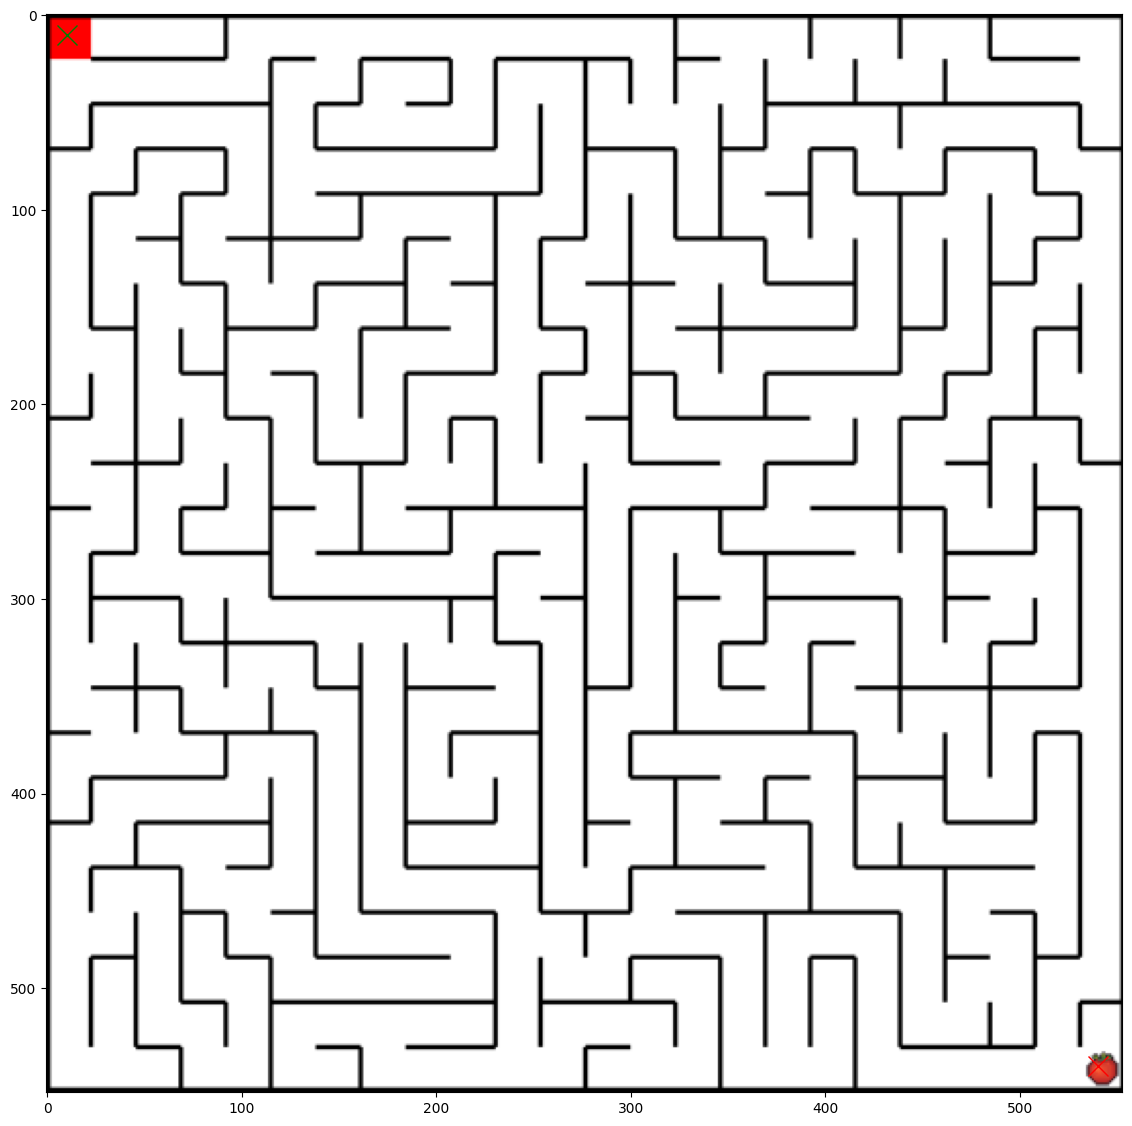

In [2]:
img_name = 'Mazes/Maze.toys/Screenshot 2024-11-17 180352.png' # File name
rgb_img = plt.imread(img_name)

plt.figure(figsize=(14, 14))
plt.imshow(rgb_img)
x0, y0 = 10, 10 # Start Point
x1, y1 = 540, 540 # End Point

plt.plot(x0, y0, 'gx', markersize=14)
plt.plot(x1, y1, 'rx', markersize=14)

### Skeleton path of image calculation

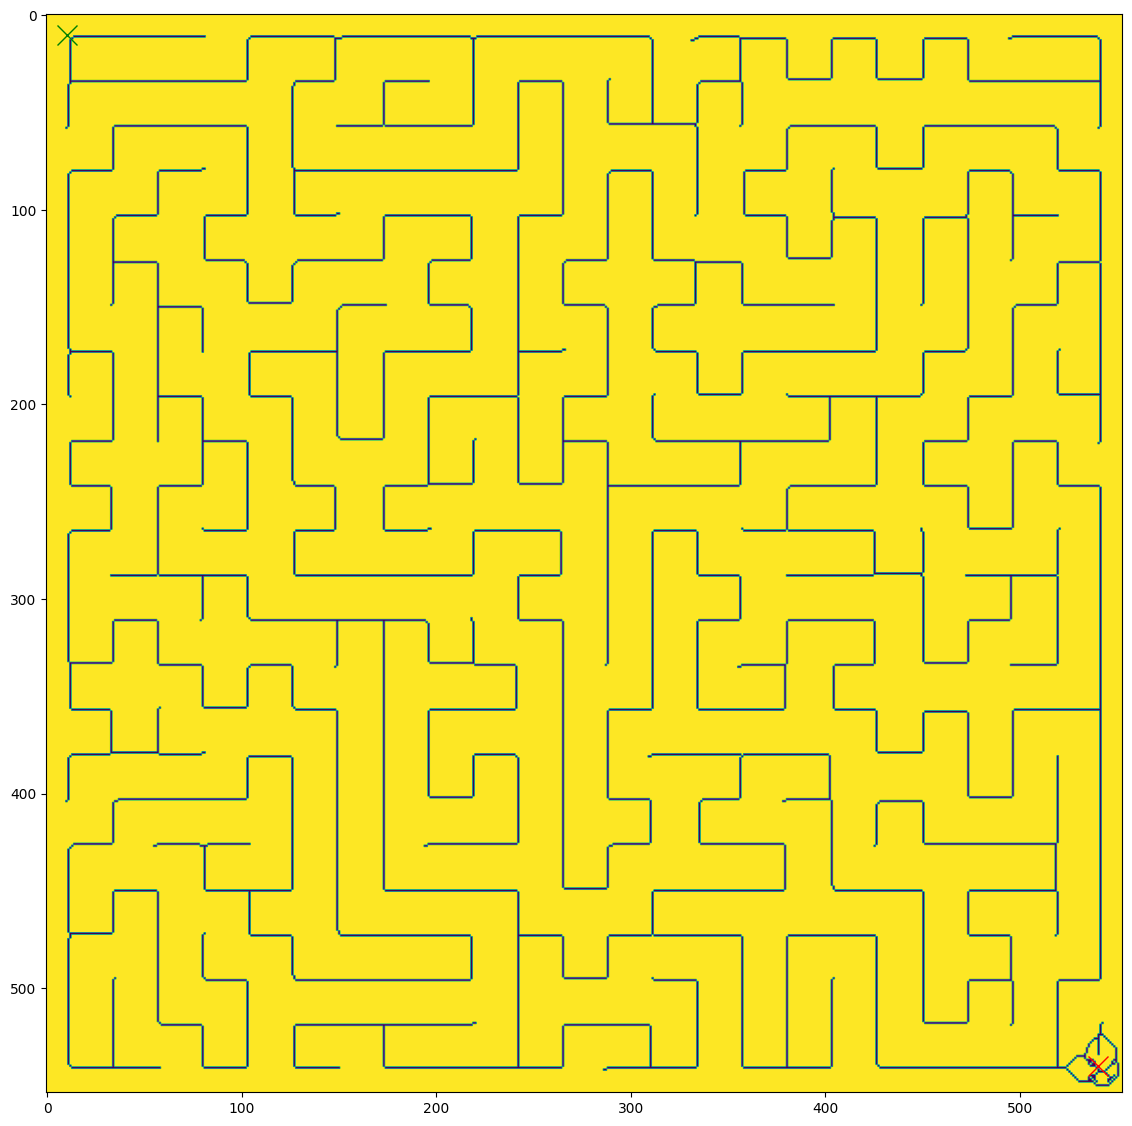

In [3]:
if rgb_img.shape.__len__() > 2:
    thr_img = rgb_img[:, :, 0] > np.max(rgb_img[:, :, 0]) / 2
else:
    thr_img = rgb_img > np.max(rgb_img) / 2
    
skeleton = skeletonize(thr_img)

plt.figure(figsize=(14, 14))
plt.imshow(skeleton)

# map of routes.
mapT = ~skeleton
plt.imshow(mapT)
plt.plot(x0, y0, 'gx', markersize=14)
plt.plot(x1, y1, 'rx', markersize=14)

### Breadth first search algorithm

Optimum route found.


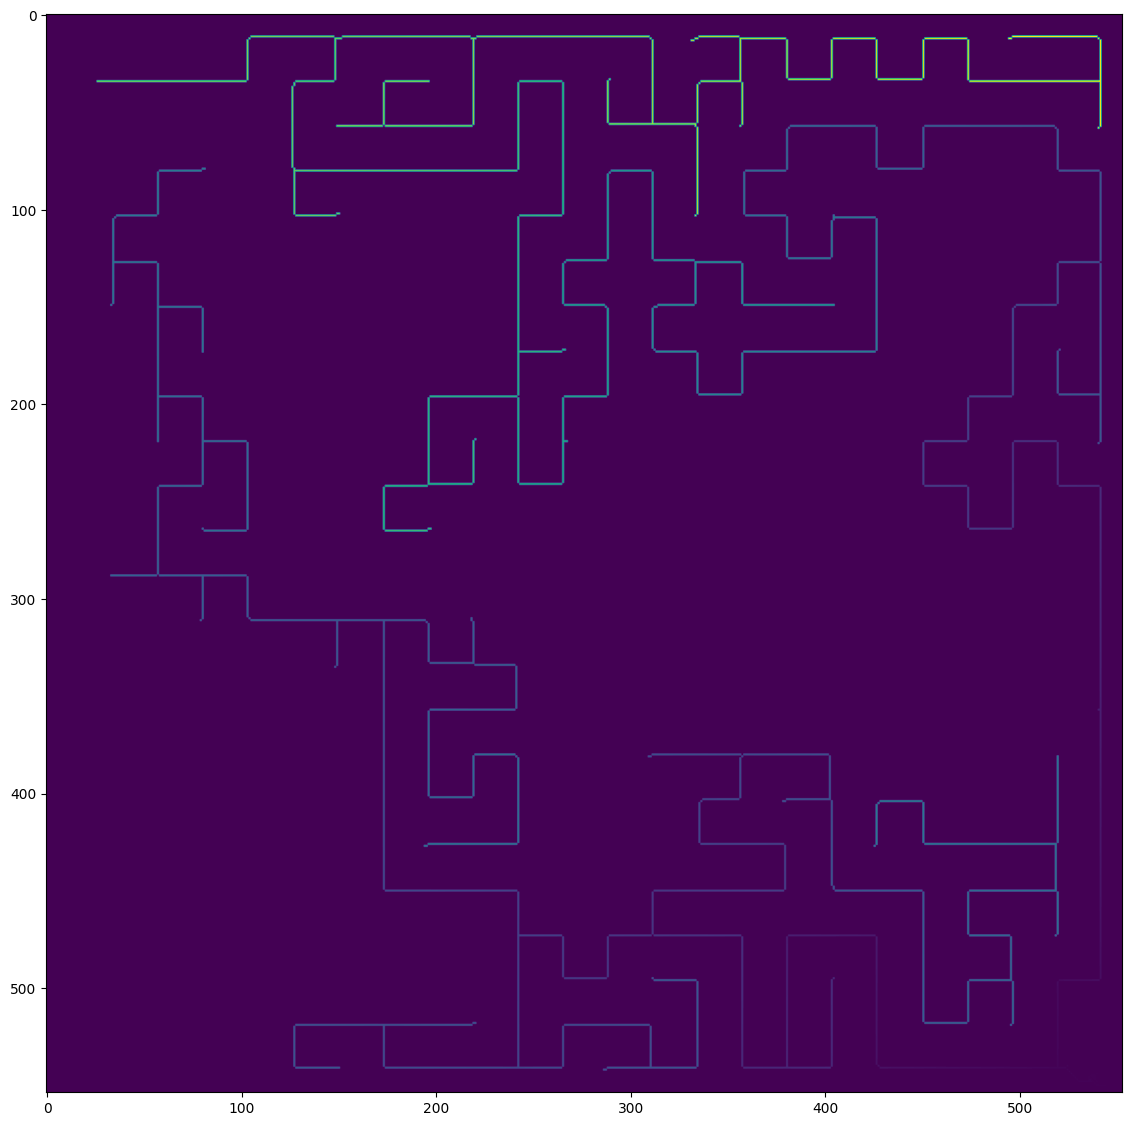

In [4]:
_mapt = np.copy(mapT)

# searching for our end point and connect to the path.
boxr = 30

# Just a little safety check, if the points are too near the edge, it will error.
if y1 < boxr: y1 = boxr
if x1 < boxr: x1 = boxr

cpys, cpxs = np.where(_mapt[y1 - boxr:y1 + boxr, x1 - boxr:x1 + boxr] == 0)
# calibrate points to main scale.
cpys += y1 - boxr
cpxs += x1 - boxr
# find closest point of possible path end points
idx = np.argmin(np.sqrt((cpys - y1) ** 2 + (cpxs - x1) ** 2))
y, x = cpys[idx], cpxs[idx]

pts_x = [x]
pts_y = [y]
pts_c = [0]

# mesh of displacements.
xmesh, ymesh = np.meshgrid(np.arange(-1, 2), np.arange(-1, 2))
ymesh = ymesh.reshape(-1)
xmesh = xmesh.reshape(-1)

dst = np.zeros((thr_img.shape))

# Depth-first algorithm exploring a tree
while True:
    # update distance.
    idc = -1
    ct = pts_c.pop(idc)
    x = pts_x.pop(idc)
    y = pts_y.pop(idc)
    # Search 3x3 neighbourhood for possible
    ys, xs = np.where(_mapt[y - 1:y + 2, x - 1:x + 2] == 0)
    # Invalidate these point from future searches.
    _mapt[ys + y - 1, xs + x - 1] = ct
    _mapt[y, x] = 9999999
    # set the distance in the distance image.
    dst[ys + y - 1, xs + x - 1] = ct + 1
    # extend our list.
    pts_x.extend(xs + x - 1)
    pts_y.extend(ys + y - 1)
    pts_c.extend([ct + 1] * xs.shape[0])
    # If we run out of points.
    if pts_x == []:
        break
    if np.sqrt((x - x0) ** 2 + (y - y0) ** 2) < boxr:
        edx = x
        edy = y
        break
plt.figure(figsize=(14, 14))
plt.imshow(dst)

path_x = []
path_y = []

y = edy
x = edx
# Traces best path
while True:
    nbh = dst[y - 1:y + 2, x - 1:x + 2]
    nbh[1, 1] = 9999999
    nbh[nbh == 0] = 9999999
    # If we reach a dead-end
    if np.min(nbh) == 9999999:
        break
    idx = np.argmin(nbh)
    # find direction
    y += ymesh[idx]
    x += xmesh[idx]

    if np.sqrt((x - x1) ** 2 + (y - y1) ** 2) < boxr:
        print('Optimum route found.')
        break
    path_y.append(y)
    path_x.append(x)

### The moment of truth

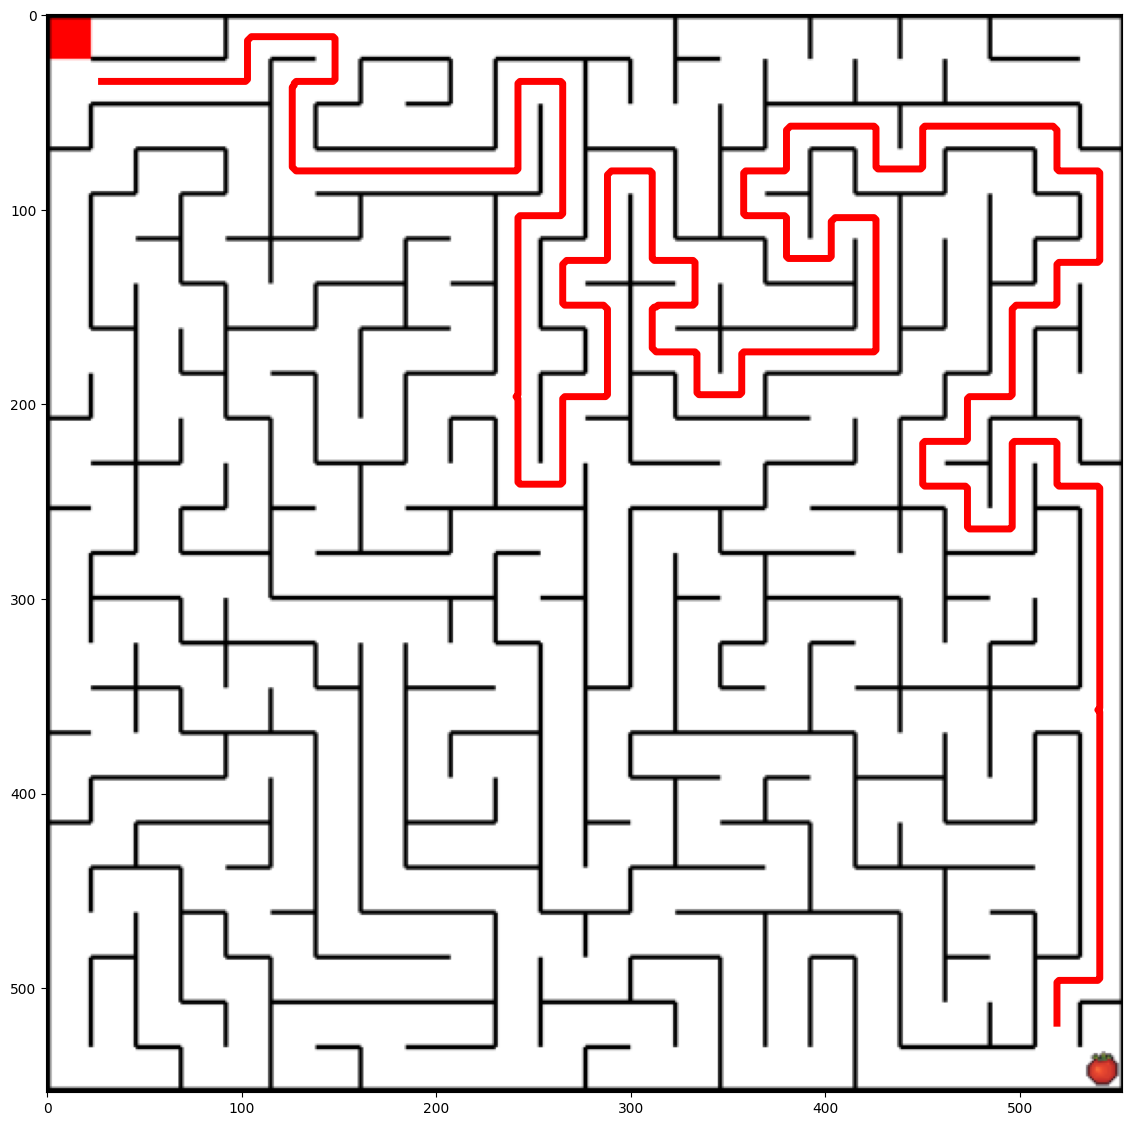

In [5]:

plt.figure(figsize=(14, 14))
plt.imshow(rgb_img)
plt.plot(path_x, path_y, 'r-', linewidth=5)